In [1]:
import pandas as pd
Nifty_data=pd.read_csv("E:/summer/NIFTY50.csv",parse_dates=['Date'],index_col=['Date'])
Nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1987 entries, 2010-04-01 to 2018-03-28
Data columns (total 6 columns):
Open                 1987 non-null float64
High                 1987 non-null float64
Low                  1987 non-null float64
Close                1987 non-null float64
Shares Traded        1987 non-null int64
Turnover (Rs. Cr)    1987 non-null float64
dtypes: float64(5), int64(1)
memory usage: 108.7 KB


In [2]:
import matplotlib.pyplot as plt
plt.plot(Nifty_data.Close)
plt.title('Nifty50 data for Close prices')
plt.show()

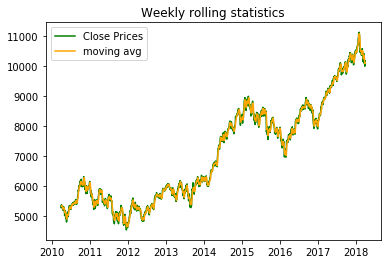

In [3]:
plt.plot(Nifty_data.Close,label='Close Prices',color='green')
plt.plot(Nifty_data['Close'].rolling(window=5).mean(),label='moving avg',color='orange')
plt.legend()
plt.title('Weekly rolling statistics')
plt.show()



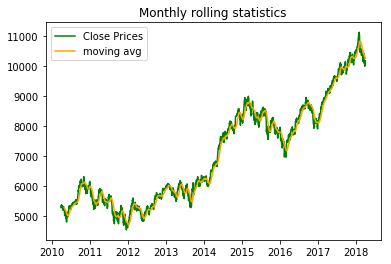

In [4]:
plt.plot(Nifty_data.Close,label='Close Prices',color='green')
plt.plot(Nifty_data['Close'].rolling(window=21).mean(),label='moving avg',color='orange')
plt.legend()
plt.title('Monthly rolling statistics')
plt.show()



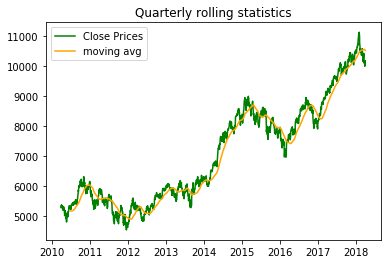

In [5]:
plt.plot(Nifty_data.Close,label='Close Prices',color='green')
plt.plot(Nifty_data['Close'].rolling(window=63).mean(),label='moving avg',color='orange')
plt.legend()
plt.title('Quarterly rolling statistics')
plt.show()



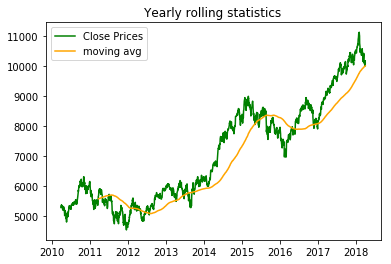

In [6]:
plt.plot(Nifty_data.Close,label='Close Prices',color='green')
plt.plot(Nifty_data['Close'].rolling(window=252).mean(),label='moving avg',color='orange')
plt.legend()
plt.title('Yearly rolling statistics')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
stnry_test=adfuller(Nifty_data['Close'],autolag='AIC')
stnry_rslt = pd.Series(stnry_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in stnry_test[4].items():
    stnry_rslt['Critical Value (%s)'%key] = value
print(stnry_rslt)
if(stnry_test[1]>0.05):
    print("Time Series is not stationary")
else:
    print("Time series is stationary")



C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Test Statistic                   -0.371803
p-value                           0.914701
#Lags Used                        1.000000
Number of Observations Used    1985.000000
Critical Value (1%)              -3.433649
Critical Value (5%)              -2.862997
Critical Value (10%)             -2.567546
dtype: float64
Time Series is not stationary


In [8]:
diff=Nifty_data['Close']-Nifty_data['Close'].shift(1)

In [9]:
diff.dropna(inplace=True)

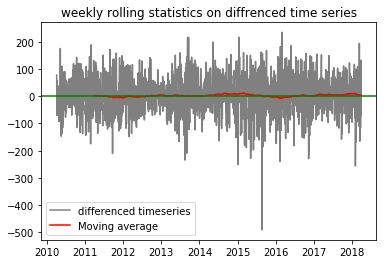

In [10]:
plt.plot(diff,label='differenced timeseries',color='grey')
plt.plot(diff.rolling(window=252).mean(),label='Moving average',color='red')
plt.title('weekly rolling statistics on diffrenced time series')
plt.axhline(y=0,color='green')
plt.legend()
plt.show()

In [11]:
stnry_test_diff=adfuller(diff,autolag='AIC')
stnry_rslt_diff = pd.Series(stnry_test_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in stnry_test[4].items():
    stnry_rslt_diff['Critical Value (%s)'%key] = value
print(stnry_rslt_diff)
if(stnry_test_diff[1]>0.05):
    print("Time Series is not stationary")
else:
    print("Time series is stationary")

Test Statistic                  -41.047846
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1985.000000
Critical Value (1%)              -3.433649
Critical Value (5%)              -2.862997
Critical Value (10%)             -2.567546
dtype: float64
Time series is stationary


In [12]:
# separating training and testing data
train = Nifty_data['Close'].iloc[:1750]
test = Nifty_data['Close'].iloc[1751:]
# building linear model
import numpy as np
from sklearn import linear_model
lm = linear_model.LinearRegression(normalize=True, fit_intercept=True)

In [13]:
lm.fit(np.arange(np.array(len(train.index))).reshape((-1,1)), train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
lm.score(np.arange(np.array(len(train.index))).reshape((-1,1)), train)

0.7783615453922795

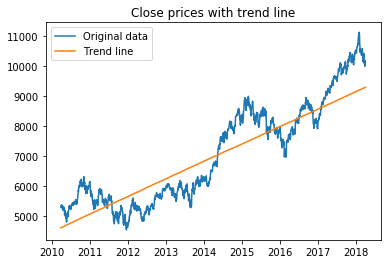

In [15]:
plt.plot(Nifty_data['Close'],label='Original data')
plt.plot(pd.Series(lm.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1))),index=Nifty_data.index),label='Trend line')
plt.title('Close prices with trend line')
plt.legend()
plt.show()

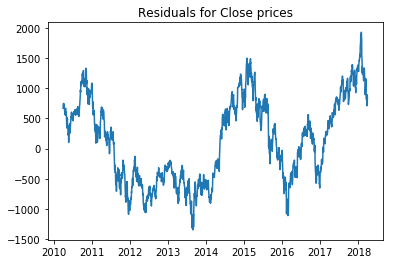

In [16]:
Residuals=Nifty_data['Close']-lm.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))
plt.plot(pd.Series(Residuals,index=Nifty_data.index),label=Residuals)
plt.title('Residuals for Close prices')
plt.show()

In [17]:
from statsmodels.tsa import seasonal
decompose = seasonal.seasonal_decompose(Nifty_data['Close'],freq=252)

In [18]:
decompose.trend.dropna(inplace=True)
decompose.resid.dropna(inplace=True)

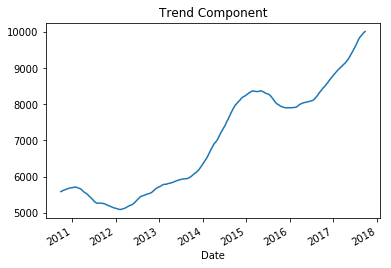

In [19]:
decompose.trend.plot()
plt.title('Trend Component')
plt.show()

In [20]:
Residuals = Nifty_data['Close'] - lm.predict(np.arange(np.array(len(Nifty_data.index))).reshape((-1,1)))

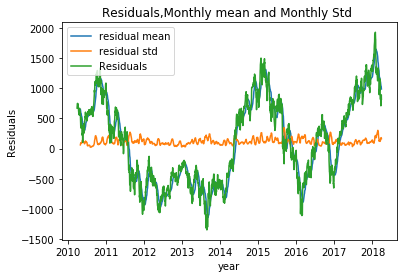

In [21]:
plt.plot(Residuals.rolling(window=21).mean(),label='residual mean')
plt.plot(Residuals.rolling(window=21).std(),label='residual std')
plt.plot(Residuals,label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Monthly mean and Monthly Std ')
plt.legend()
plt.show()

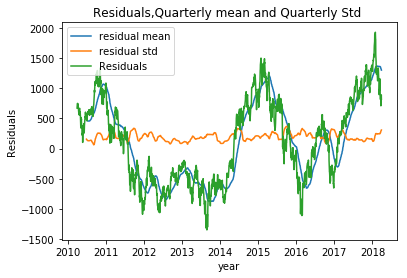

In [22]:
plt.plot(Residuals.rolling(window=63).mean(),label='residual mean')
plt.plot(Residuals.rolling(window=63).std(),label='residual std')
plt.plot(Residuals,label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Quarterly mean and Quarterly Std ')
plt.legend()
plt.show()

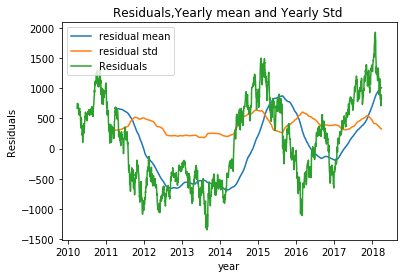

In [23]:
plt.plot(Residuals.rolling(window=252).mean(),label='residual mean')
plt.plot(Residuals.rolling(window=252).std(),label='residual std')
plt.plot(Residuals,label='Residuals')
plt.xlabel('year')
plt.ylabel('Residuals')
plt.title('Residuals,Yearly mean and Yearly Std ')
plt.legend()
plt.show()

In [24]:
Nifty_data['Residuals']=Residuals

In [25]:
Nifty_data['month']=Nifty_data.index.map(lambda x:x.month)

In [26]:
Nifty_data['year']=Nifty_data.index.map(lambda x:x.year)

In [27]:
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                   4: 'Q2', 5: 'Q2', 6: 'Q2',
                   7: 'Q3', 8: 'Q3', 9: 'Q3',
                   10: 'Q4', 11: 'Q4', 12: 'Q4'
                  }
Nifty_data['quarter'] = Nifty_data['month'].map(lambda m: month_quarter_map.get(m))

In [28]:
# Creating new subseries
sub_series_quarterly = Nifty_data.groupby(by=['year', 'quarter'])['Residuals'].aggregate([np.mean, np.std])
sub_series_quarterly.columns = ['Quarterly Mean Close', 'Quarterly Standard Deviation Close']
#Create row indices of seasonal_sub_series_data using Year & Quarter
sub_series_quarterly.reset_index(inplace=True)
sub_series_quarterly.index = sub_series_quarterly['year'].astype(str) + '-' + sub_series_quarterly['quarter']



In [29]:
sub_series_quarterly.head()

,year,quarter,Quarterly Mean Close,Quarterly Standard Deviation Close
2010-Q2,2010,Q2,485.421131,157.670891
2010-Q3,2010,Q3,696.596141,193.226523
2010-Q4,2010,Q4,1045.849666,155.593209
2011-Q1,2011,Q1,430.527603,234.236798
2011-Q2,2011,Q2,297.627121,219.394727


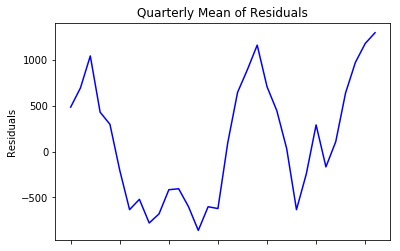

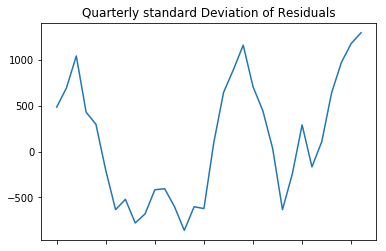

In [30]:
sub_series_quarterly['Quarterly Mean Close'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.ylabel('Residuals')
plt.show()
sub_series_quarterly['Quarterly Mean Close'].plot()
plt.title('Quarterly standard Deviation of Residuals')
plt.show()

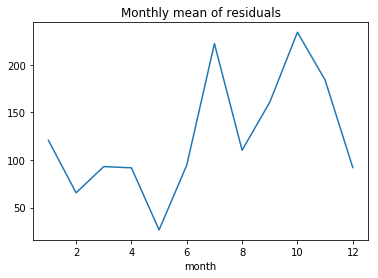

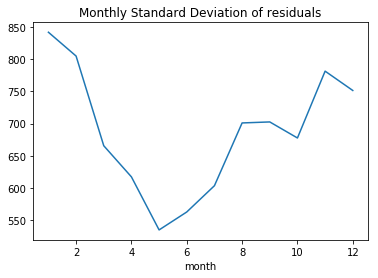

In [31]:
# Creating new subseries
sub_series_Monthly = Nifty_data.groupby(by=['month'])['Residuals'].aggregate([np.mean, np.std])
sub_series_Monthly.columns = ['monthly Mean', 'monthly Standard Deviation']
# plotting sub series
sub_series_Monthly['monthly Mean'].plot()
plt.title('Monthly mean of residuals')
plt.show()
sub_series_Monthly['monthly Standard Deviation'].plot()
plt.title('Monthly Standard Deviation of residuals')
plt.show()

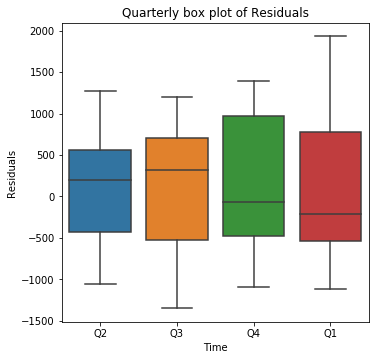

In [32]:
# Multiple Boxplot(Quarterly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals','quarter']], y=Nifty_data['Residuals'], x=Nifty_data['quarter'])
g.set_title('Quarterly box plot of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals')
plt.show()

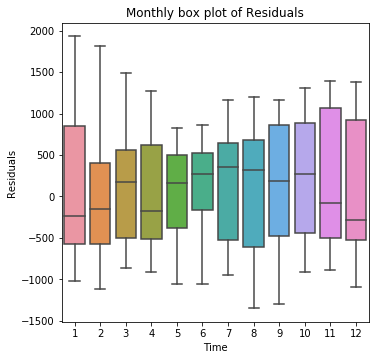

In [33]:
# Multiple Boxplot(Monthly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals','month']], y=Nifty_data['Residuals'], x=Nifty_data['month'])
g.set_title('Monthly box plot of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals')
plt.show()

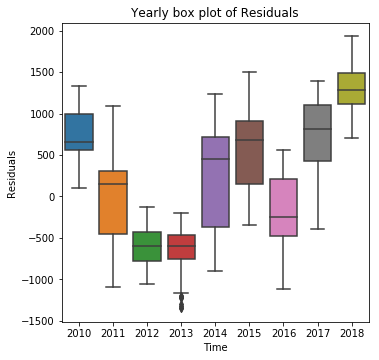

In [34]:
# Multiple Boxplot(Yearly)
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=Nifty_data[['Residuals','year']], y=Nifty_data['Residuals'], x=Nifty_data['year'])
g.set_title('Yearly box plot of Residuals')
g.set_xlabel('Time')
g.set_ylabel('Residuals')
plt.show()

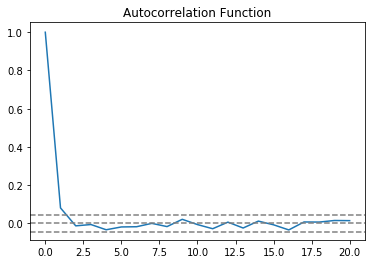

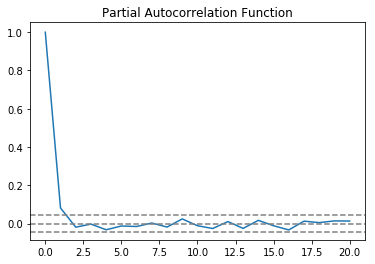

In [35]:
from statsmodels.tsa.stattools import acf, pacf
# ACF plot
lag_acf=acf(diff,nlags=20)
lag_pacf=pacf(diff,nlags=20,method='ols')
# plot ACF
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
# plot PACF
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [36]:
from statsmodels.tsa.arima_model import ARIMA
# seperating training and testing data
train=Nifty_data['Close'].iloc[:1750]
test=Nifty_data['Close'].iloc[1751:]
# Building ARIMA model
model = ARIMA(Nifty_data['Close'], order=(2, 1, 2))  
results_ARIMA = model.fit()
 
# taking it back to original scale
predict_Arima=pd.Series(results_ARIMA.fittedvalues, copy=True)
predict_Arima.head()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Date
2010-04-05    2.429683
2010-04-06    8.567037
2010-04-07    0.673000
2010-04-08    3.941245
2010-04-09   -4.477808
dtype: float64

In [37]:
predict_Arima_cumsum=predict_Arima.cumsum()
predict_Arima_data=pd.Series(Nifty_data['Close'].iloc[0], index=Nifty_data.index)
predict_Arima_data=predict_Arima_data.add(predict_Arima_cumsum,fill_value=0)
predict_Arima_data.head()

Date
2010-04-01    5290.500000
2010-04-05    5292.929683
2010-04-06    5301.496720
2010-04-07    5302.169720
2010-04-08    5306.110965
dtype: float64

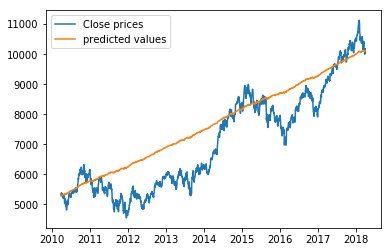

In [38]:
plt.plot(Nifty_data['Close'],label='Close prices')
plt.plot(predict_Arima_data,label='predicted values')
plt.legend()
plt.show()

In [39]:
import sklearn.metrics
sklearn.metrics.r2_score(Nifty_data['Close'],predict_Arima_data)

0.7398187397952602

In [40]:
training_set = [x for x in train]
predictions = []
XYZ=training_set
for i in range(len(test)):
    model = ARIMA(training_set, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    predictions.append(output[0])
    obs = test[i]
    XYZ.append(output[0])
    training_set.append(obs)
    print('predicted=%f, expected=%f' % (output[0], obs))

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=9141.223915, expected=9103.500000
predicted=9102.707352, expected=9136.400000
predicted=9140.323736, expected=9119.400000
predicted=9120.066638, expected=9217.950000
predicted=9226.972492, expected=9306.600000
predicted=9315.836470, expected=9351.850000
predicted=9358.306720, expected=9342.150000
predicted=9344.381322, expected=9304.050000
predicted=9303.580526, expected=9313.800000
predicted=9316.264764, expected=9311.950000
predicted=9313.674638, expected=9359.900000
predicted=9365.302640, expected=9285.300000
predicted=9282.065634, expected=9314.050000
predicted=9317.582498, expected=9316.850000
predicted=9318.907249, expected=9407.300000
predicted=9415.901423, expected=9422.400000
predicted=9426.246822, expected=9400.900000
predicted=9401.804533, expected=9445.400000
predicted=9450.687390, expected=9512.250000
predicted=9519.547896, expected=9525.750000
predicted=9529.523185, expected=9429.450000
predicted=9424.832780, expected=9427.900000
predicted=9429.069759, expected=

predicted=10641.056669, expected=10632.200000
predicted=10634.666502, expected=10651.200000
predicted=10655.053993, expected=10681.250000
predicted=10685.889819, expected=10741.550000
predicted=10748.542103, expected=10700.450000
predicted=10700.295305, expected=10788.550000
predicted=10797.318237, expected=10817.000000
predicted=10821.943733, expected=10894.700000
predicted=10903.309140, expected=10966.200000
predicted=10974.657429, expected=11083.700000
predicted=11095.715148, expected=11086.000000
predicted=11089.964416, expected=11069.650000
predicted=11071.724186, expected=11130.400000
predicted=11137.525490, expected=11049.650000
predicted=11046.568357, expected=11027.700000
predicted=11028.140983, expected=11016.900000
predicted=11017.921355, expected=10760.600000
predicted=10743.530171, expected=10666.550000
predicted=10659.941183, expected=10498.250000
predicted=10486.267812, expected=10476.700000
predicted=10475.332273, expected=10576.850000
predicted=10584.477859, expected=1

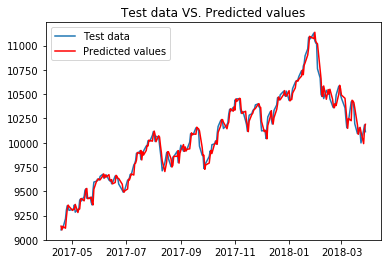

In [41]:
pred=pd.Series(predictions,index=test.index)
plt.plot(test,label='Test data')
plt.plot(pred, color='red',label='Predicted values')
plt.title('Test data VS. Predicted values')
plt.legend()
plt.show()

In [42]:
sklearn.metrics.r2_score(test,pred)

0.9777852479774791